In [3]:
import pandas as pd
import numpy as np

# load dataset 
df = pd.read_csv("data/online_retail.csv", encoding="ISO-8859-1")

# preview data
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  str    
 1   StockCode    1067371 non-null  str    
 2   Description  1062989 non-null  str    
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  str    
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  str    
dtypes: float64(2), int64(1), str(5)
memory usage: 65.1 MB


,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


This dataset contains real e-commerce transaction data, including invoice details, product descriptions, quantities, prices, and customer identifiers. The initial inspection helps understand data quality, structure, and potential preprocessing needs.

In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [6]:
df = df[df["Quantity"] > 0]
df = df[df["Price"] > 0]

In [7]:
df = df.dropna(subset=["Customer ID"])

In [8]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["InvoiceDay"] = df["InvoiceDate"].dt.day


In [9]:
df["TotalSales"] = df["Quantity"] * df["Price"]


Data cleaning was performed to ensure reliable analysis. Invalid transactions (negative quantities and prices) were removed, missing customer identifiers were handled, date fields were converted, and key business metrics such as total sales were created.

In [10]:
total_revenue = df["TotalSales"].sum()
total_orders = df["Invoice"].nunique()
total_customers = df["Customer ID"].nunique()

total_revenue, total_orders, total_customers

(np.float64(17743429.178000003), 36969, 5878)

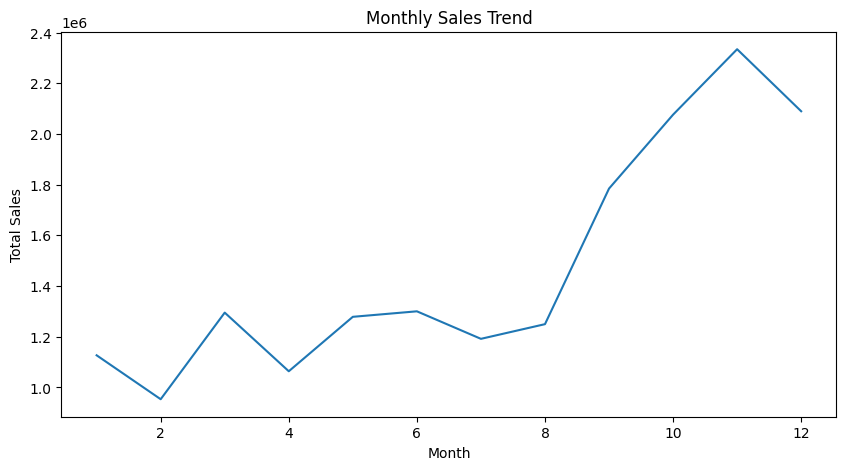

In [25]:
monthly_sales = df.groupby("InvoiceMonth")["TotalSales"].sum()

monthly_sales

import matplotlib.pyplot as plt

monthly_sales.plot(kind="line", figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()



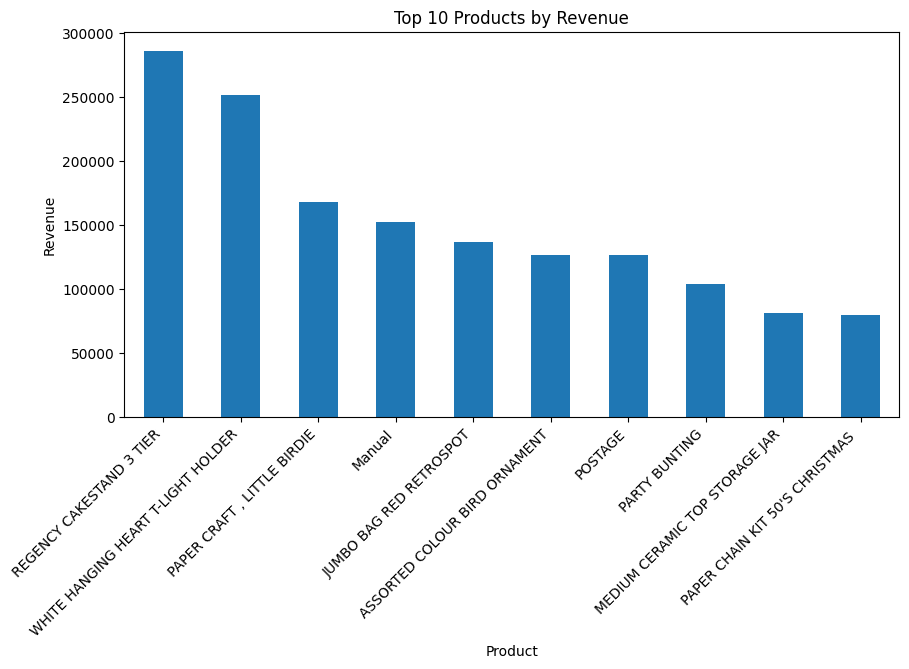

In [27]:
top_products = (
    df.groupby("Description")["TotalSales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products


top_products.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.show()


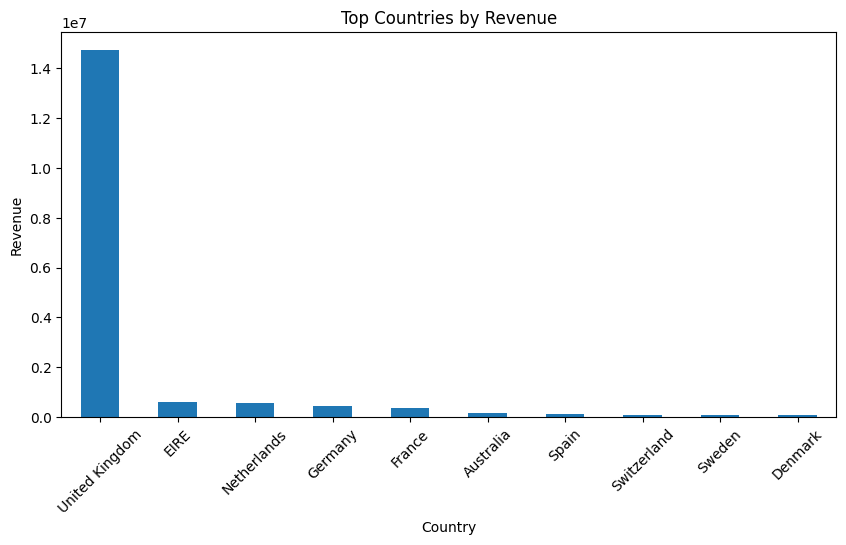

In [29]:
country_sales = (
    df.groupby("Country")["TotalSales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

country_sales


country_sales.plot(kind="bar", figsize=(10,5))
plt.title("Top Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()



Key Insights:

°Sales show clear monthly patterns, indicating seasonality.

°A small number of products generate a large share of total revenue.

°Revenue is concentrated in a limited number of countries, suggesting opportunities for targeted market expansion.

Business Recommendations:

Focus marketing and inventory efforts on top-performing products to maximize revenue.

Leverage seasonal sales trends to plan promotions and stock levels in advance.

Prioritize high-revenue countries for targeted campaigns and customer retention strategies.

Monitor customer purchasing behavior regularly to identify churn or upsell opportunities.

In [31]:
assert df["TotalSales"].min() > 0
assert df["Customer ID"].isnull().sum() == 0


In [33]:
df.duplicated().sum()

np.int64(26124)

Basic data validation checks were applied to ensure data integrity, including validation of key metrics, missing values, and duplicate records.

In [34]:
df.to_csv("data/clean_ecommerce_data.csv", index=False)

In [35]:
summary = pd.DataFrame({
    "Metric": ["Total Revenue", "Total Orders", "Total Customers"],
    "Value": [total_revenue, total_orders, total_customers]
})

summary


,Metric,Value
0,Total Revenue,1.774343e+07
1,Total Orders,3.696900e+04
2,Total Customers,5.878000e+03
